# Credit Fraud Detection

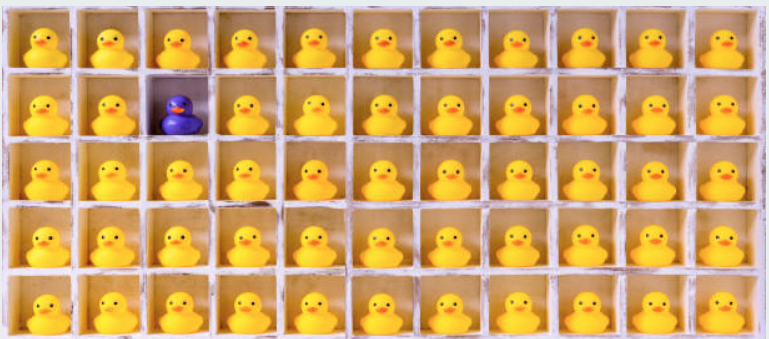

<b><h3>Introduction to Dataset</h3></b><br>
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.<br>
<br>
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.<br>

<h3><b>Objectives</b><br></h3>

<b>Imbalanced Dataset</b><br> 
SMOTE and Other Techniques<br>
<br>
<b>EDA</b><br>
EDA with Known Features<br>
EDA with Unknown Features<br>
<br>
<b>Visualisation of Data</b><br>
Box Plot, Distribution Plot,Headmap, sns
<br>
Correlations<br>
<br>
<b>Clustering</b><br>
Tsne Clustering<br>
DBSCAN Clustering<br>
<br>
Time Plots with DateTime<br>
<br>
Feature Importance with RF<br>
<br>
<b> Models</b><br>
Logistic Regression, Random Forest, SVM, XGBoost , Keras Sequential<br>
<br>
<b> Metrics</b><br>
ROC and Confusion Metrics
 <br>   


In [ ]:
#all imports  and datset is from kaggle

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")



In [101]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory data analysis

In [10]:
df.shape

(284807, 31)

df.info()

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [13]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<br>
<h2> Known Columns ( Time , Amount ) and Unknown Columns ( v1- v28 )

In [15]:
import matplotlib.pyplot as plt   # For plotting graphs
import matplotlib.ticker as mtick # For specifying axes ticks
import seaborn           as sns   # For interactive plots
import os

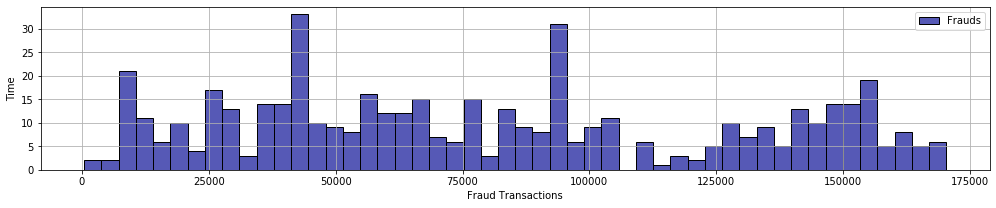

In [135]:
fig= plt.figure(figsize= (17,3))
ax = sns.histplot(df.Time[df["Class"] == 1], color="#1E229E", bins=50)
#ax =sns.histplot(df.Time[df["Class"] == 1], color="royalblue", bins=50)
ax.set_xlabel("Fraud Transactions")
ax.set_ylabel("Time")
plt.grid()
ax = ax.legend(["Frauds"])

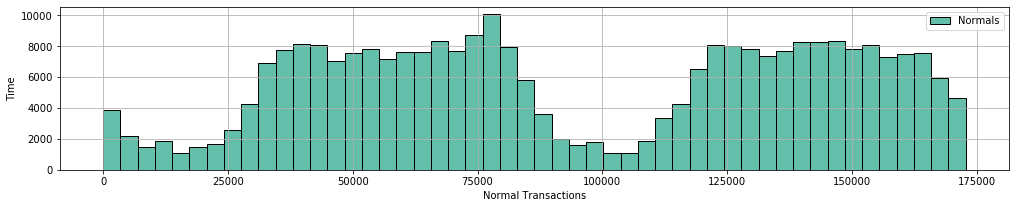

In [132]:
fig= plt.figure(figsize= (17,3))
#ax = sns.histplot(df.Time[df["Class"] == 0], color="seagreen", bins=50)
ax =sns.histplot(df.Time[df["Class"] == 0], color="#30AA8E", bins=50)
ax.set_xlabel("Normal Transactions")
ax.set_ylabel("Time")
plt.grid()
ax = ax.legend(["Normals"])

In [133]:
df.Amount[df.Class==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
df.Amount[df.Class==0].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

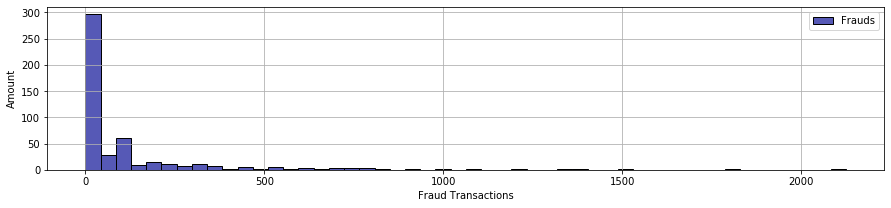

In [136]:
fig= plt.figure(figsize= (15,3))
ax = sns.histplot(df.Amount[df["Class"] == 1], color="#1E229E", bins=50)
#ax =sns.histplot(df.Time[df["Class"] == 1], color="royalblue", bins=50)
ax.set_xlabel("Fraud Transactions")
ax.set_ylabel("Amount")
plt.grid()
ax = ax.legend(["Frauds"])

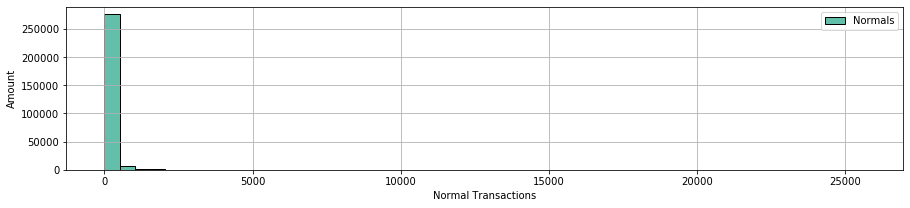

In [110]:
fig= plt.figure(figsize= (15,3))
#ax = sns.histplot(df.Time[df["Class"] == 0], color="seagreen", bins=50)
ax =sns.histplot(df.Amount[df["Class"] == 0], color="#30AA8E", bins=50)
ax.set_xlabel("Normal Transactions")
ax.set_ylabel("Amount")
plt.grid()
ax = ax.legend(["Normals"])

In [ ]:
#BOX PLOT IS Just an extreme

In [ ]:
fig= plt.figure(figsize= (20,3))
sns.boxplot(df['Class'])
plt.grid()
plt.show()

# Unknown Columns and influence on classes

In [22]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
v_features = df.iloc[:,1:29].columns

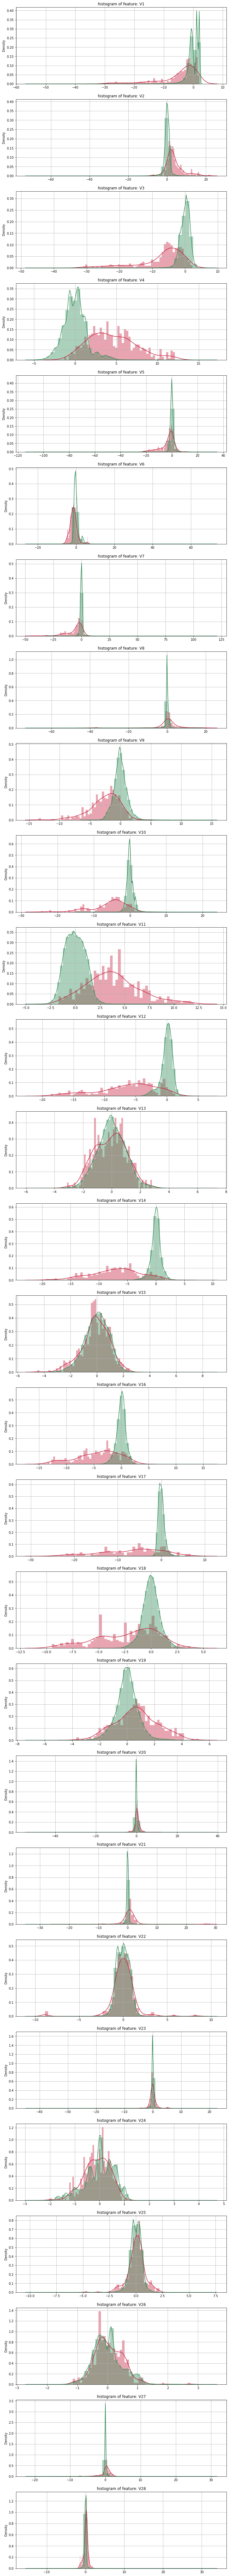

In [121]:
plt.figure(figsize=(12,30*5))
gs = gridspec.GridSpec(28, 1)

for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50, color= "#C61C3B" )
    sns.distplot(df[cn][df.Class == 0], bins=50, color= "seagreen")
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
    plt.grid()  
plt.show()

<h3> Conclusion these features have similar distribution and can be dropped<br></h3>
<br>You can drop all of the features that have very similar distributions between the two types of transactions. <br>
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1) 

# Visualizing the Data with t-SNE

In [116]:
tsne_data = pd.read_csv("creditcard.csv")

In [117]:
#Set df2 equal to all of the fraulent and 10,000 normal transactions.
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 10000)], axis = 0)

In [118]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [119]:
#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y = df2.iloc[:,-1].values

In [120]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

<Figure size 432x288 with 0 Axes>

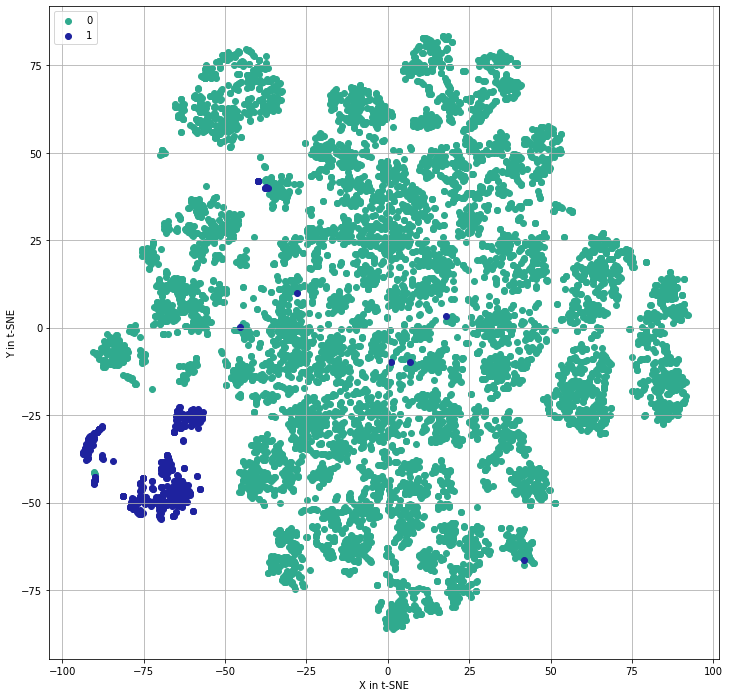

In [137]:

color_map = {0:'#30AA8E', 1:'#1E229E'}
plt.figure()
plt.figure(figsize=(12,12))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# DBSCAN Clustering is pending

https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

<h3> Majority of the fradulant data can be seperated and have definite clusters </h3>

In [ ]:
#Distribution of Time and Amount

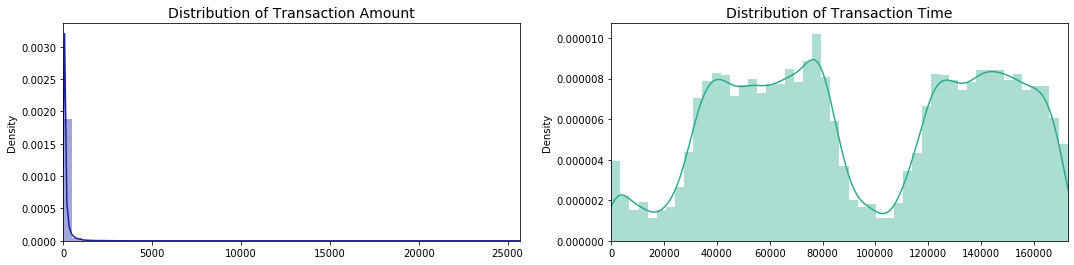

In [138]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='#1E229E')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])


sns.distplot(time_val, ax=ax[1], color='#30AA8E')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

# Imbalanced data and understanding corelation

In [35]:
# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5321,5227.0,-1.010945,0.560045,3.469253,4.086306,-0.004279,1.065760,-0.520984,0.448566,0.132187,...,0.062800,0.456209,0.039186,0.499169,-0.279007,0.054515,0.123424,0.147760,47.82,0
63421,50706.0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1
126531,78025.0,0.941852,-0.221746,1.305384,1.204436,-0.322458,1.645322,-0.877336,0.659350,0.829264,...,0.080895,0.595574,0.160727,-0.634376,0.061047,-0.300853,0.145265,0.027195,9.99,0
215984,140308.0,-4.861747,-2.722660,-4.656248,2.502005,-2.008346,0.615422,-3.485680,1.878856,-1.116268,...,1.138876,1.033664,-0.806199,-1.511046,-0.191731,0.080999,1.215152,-0.923142,592.90,1
44001,41743.0,-2.144411,1.073499,-2.773663,1.384394,-4.015477,0.747235,1.525638,0.192988,-2.431862,...,0.144653,-0.885682,0.625099,0.096527,-0.189455,0.532908,0.423045,-0.210266,802.52,1


In [36]:
new_df.shape

(984, 31)

In [37]:
new_df["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
#Understand corelation of features

<b>Negative Correlations:</b> V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.<br>
<b>Positive Correlations:</b> V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.<br>
<b>BoxPlots: </b>We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.<br>

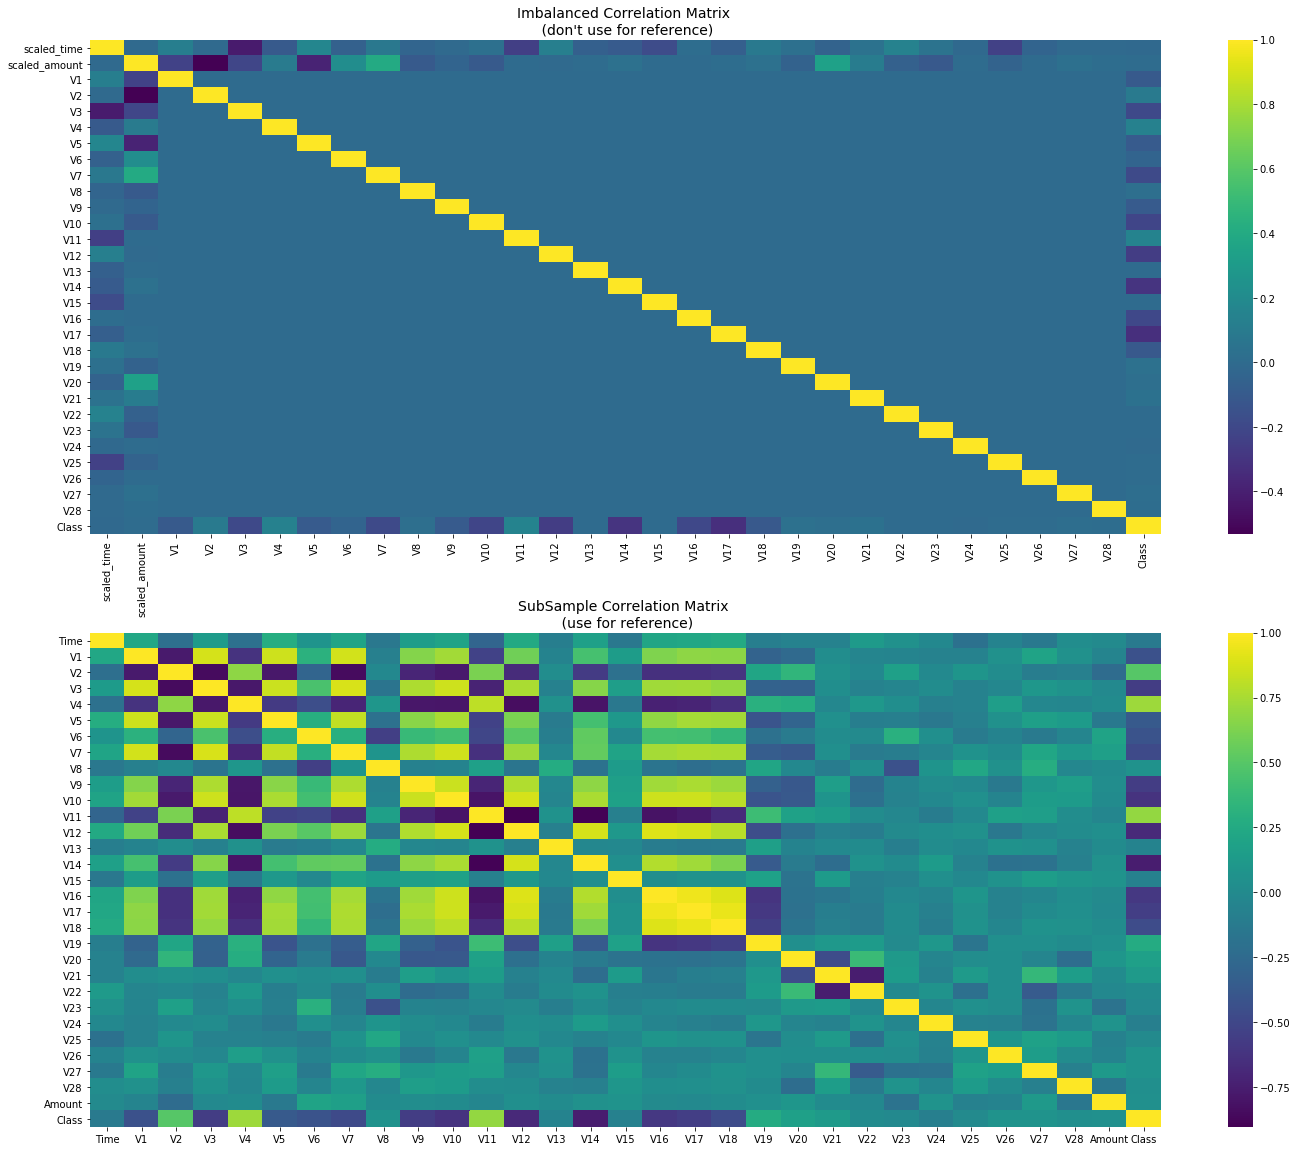

In [99]:
 #Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap="viridis", annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap="viridis", annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


In [ ]:
#V14,#V12, V10, #V17 are deep red and have negative coorelation  - LOWER VALUES == FRAUD

In [ ]:
#V4, V2, V11, V19 have positive coorelation higher value == FRAUD

In [ ]:
## Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

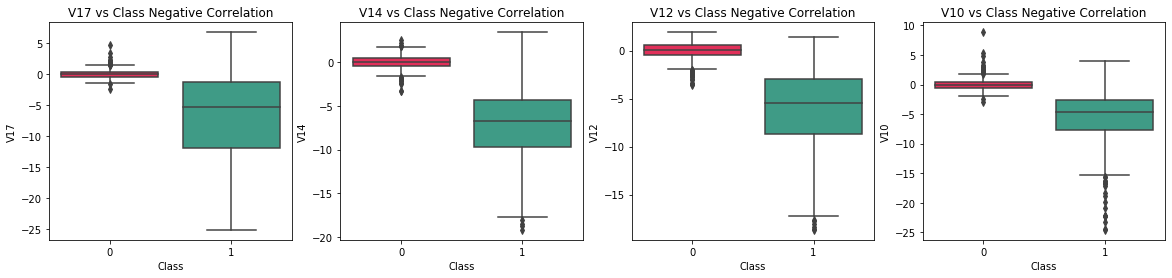

In [127]:
colors=["#FF124B","#30AA8E"]
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [ ]:
#V4, V2, V11, V19 have positive coorelation higher value == FRAUD

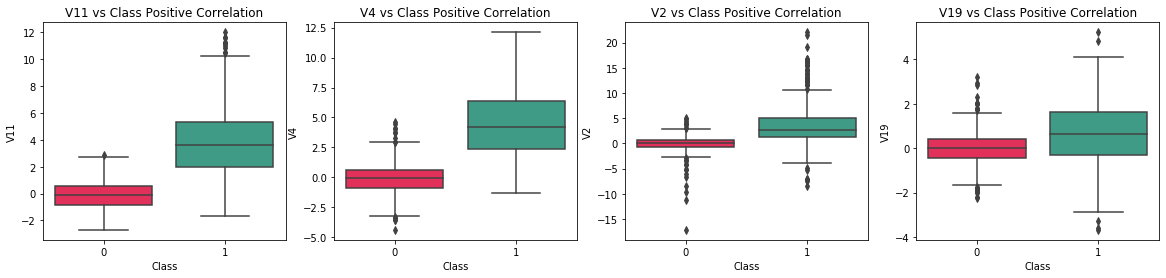

In [128]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [ ]:
#lets plot the coorelation distribution

In [ ]:
#these are the negative coorelation

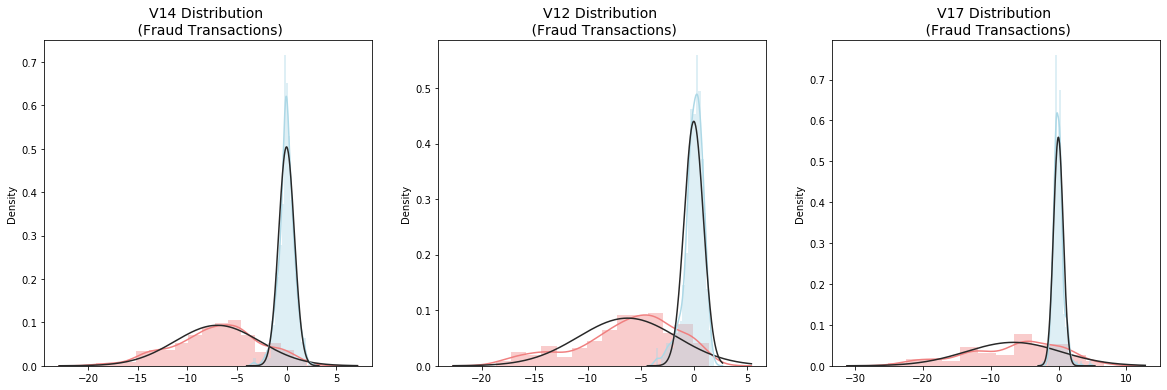

In [42]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
v14_notfraud_dist = new_df['V14'].loc[new_df['Class'] == 0].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='lightcoral')
sns.distplot(v14_notfraud_dist,ax=ax1, fit=norm, color='lightblue')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
v12_notfraud_dist = new_df['V12'].loc[new_df['Class'] == 0].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='lightcoral')
sns.distplot(v12_notfraud_dist,ax=ax2, fit=norm, color='lightblue')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values
v17_notfraud_dist = new_df['V17'].loc[new_df['Class'] == 0].values
sns.distplot(v17_fraud_dist,ax=ax3, fit=norm, color='lightcoral')
sns.distplot(v17_notfraud_dist,ax=ax3, fit=norm, color='lightblue')
ax3.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [ ]:
#lets plot the coorelation distribution
#THESE ARE THE POSITIVE VALUES AND POSITIVE COORELATIONS

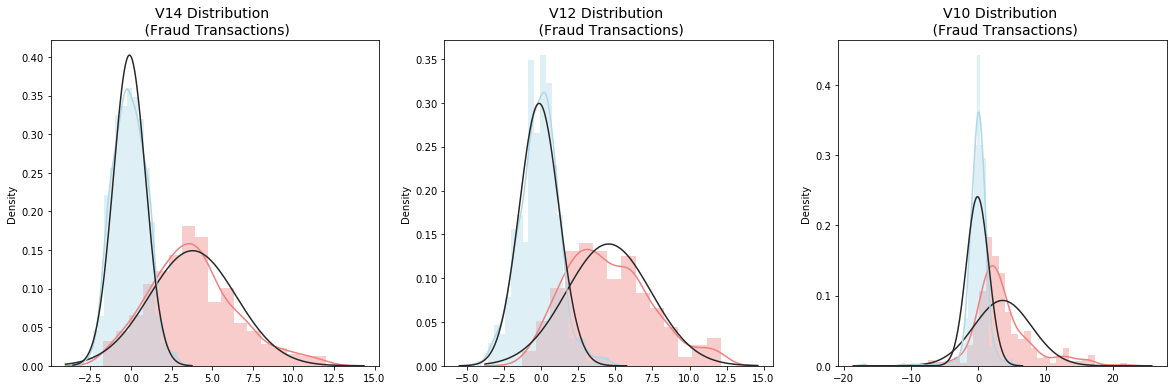

In [43]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v11_fraud_dist = new_df['V11'].loc[new_df['Class'] == 1].values
v11_notfraud_dist = new_df['V11'].loc[new_df['Class'] == 0].values
sns.distplot(v11_fraud_dist,ax=ax1, fit=norm, color='lightcoral')
sns.distplot(v11_notfraud_dist,ax=ax1, fit=norm, color='lightblue')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v4_fraud_dist = new_df['V4'].loc[new_df['Class'] == 1].values
v4_notfraud_dist = new_df['V4'].loc[new_df['Class'] == 0].values
sns.distplot(v4_fraud_dist,ax=ax2, fit=norm, color='lightcoral')
sns.distplot(v4_notfraud_dist,ax=ax2, fit=norm, color='lightblue')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V2'].loc[new_df['Class'] == 1].values
v10_notfraud_dist = new_df['V2'].loc[new_df['Class'] == 0].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='lightcoral')
sns.distplot(v10_notfraud_dist,ax=ax3, fit=norm, color='lightblue')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

# Time distribution

In [44]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

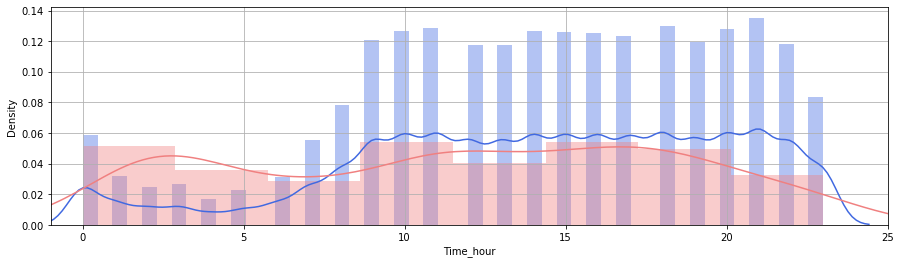

In [45]:
#whats hours do fraud occur

plt.figure(figsize=(15,4))
sns.distplot(df[df['Class'] == 0]["Time_hour"], 
             color='royalblue')
sns.distplot(df[df['Class'] == 1]["Time_hour"], 
             color='lightcoral')

plt.xlim([-1,25])
plt.grid()
plt.show()

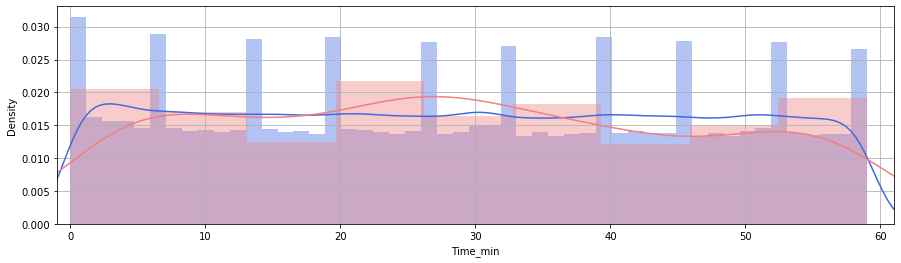

In [46]:
#whats hours do fraud occur

plt.figure(figsize=(15,4))
sns.distplot(df[df['Class'] == 0]["Time_min"], 
             color='royalblue')
sns.distplot(df[df['Class'] == 1]["Time_min"], 
             color='lightcoral')

plt.xlim([-1,61])
plt.grid()
plt.show()

In [47]:
df[["Amount","Class"]].describe()

,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


# log of Amount can help us better visualise the box plot in the same scale

In [48]:
df['Amount_log'] = np.log(df.Amount + 0.01)

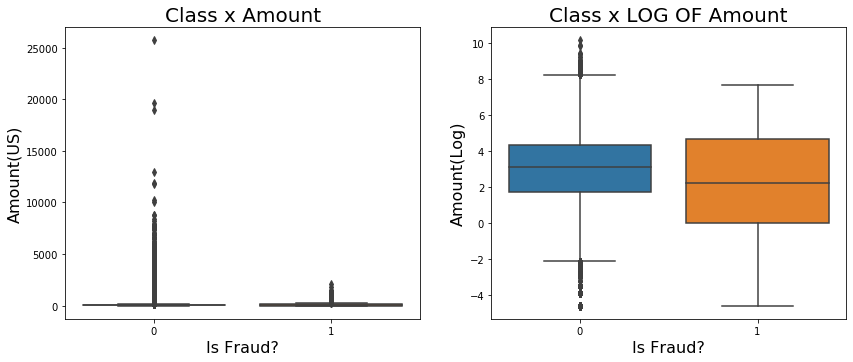

In [49]:
plt.figure(figsize=(14,6))


plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)


plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df)
ax1.set_title("Class x LOG OF Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [50]:
#frauds are withing mean of Amount

<Figure size 1008x432 with 0 Axes>

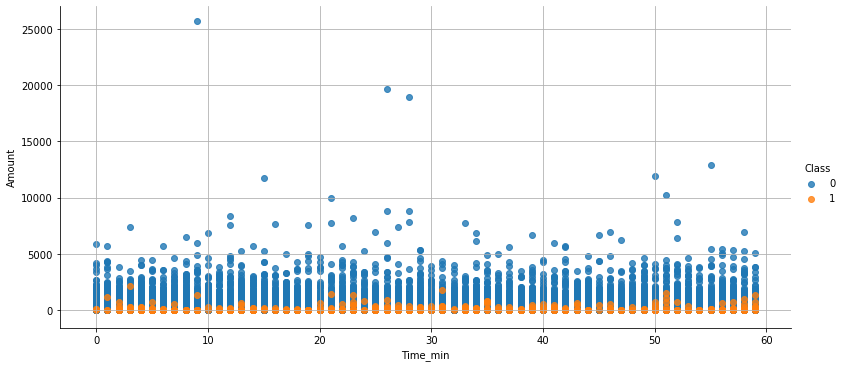

In [51]:
plt.figure(figsize=(14,6))
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=2.2,
                data=df, hue='Class')
plt.grid()
plt.show()

<Figure size 1008x432 with 0 Axes>

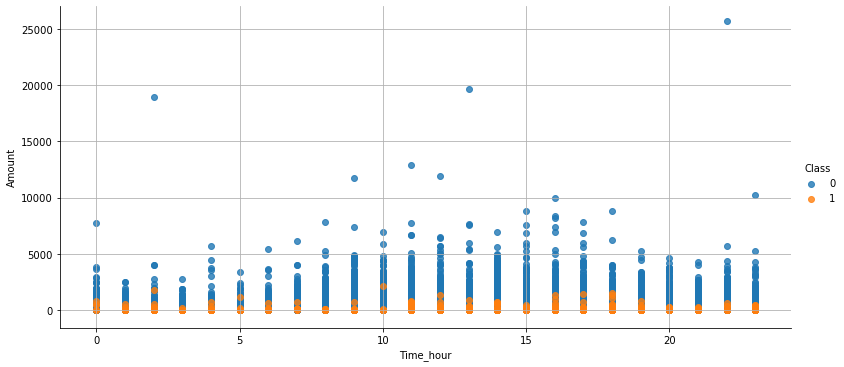

In [52]:
plt.figure(figsize=(14,6))
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False, aspect=2.2,
                data=df, hue='Class')
plt.grid()
plt.show()

# Imbalanced Dataset

# Data Preprocessing and Models - SMOTE , StandardScalar, LR, RF, TF

<br> <b>Recall of fraud cases (sensitivity)</b> summarizes true positive rate (True positive/True positive + False Negative) - how many cases we got correct out of all the positive ones<br>
<b>Recall of non-fraud (specificity)</b>  summarizes true negative rate (True negative/True negative + False positive) - how many cases we got correct out of all the negative ones<br>
<b>Precision of fraud cases </b> (True positive/True positive + False positive) summarizes the accuracy of fraud cases detected - out of all predicted as fraud, how many are correct<br>
<b>Precision of non-fraud cases </b> (True negative/True negative + False negative) summarizes the accuracy of non-fraud cases detected - out of all predicted as non-fraud, how many are correct<br>
<b>F1-score</b>  is the harmonic mean of recall and precision<br><br><br>

In [53]:
df= pd.read_csv("creditcard.csv")

In [54]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [55]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


<H2> Logistic Regression with RobustScalar

In [56]:
from sklearn.model_selection import train_test_split 

x = np.array(df.iloc[:, df.columns != 'Class'])
y = np.array(df.iloc[:, df.columns == 'Class'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     56861
       Fraud       0.88      0.63      0.74       101

    accuracy                           1.00     56962
   macro avg       0.94      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



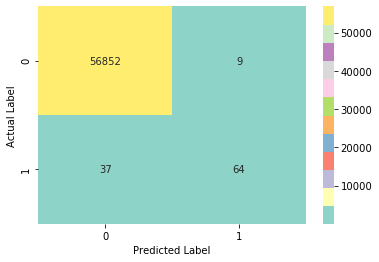

In [65]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Set3", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:

#SMOTE

Transaction Number x_train dataset:  (227845, 30)
Transaction Number y_train dataset:  (227845, 1)
Transaction Number x_test dataset:  (56962, 30)
Transaction Number y_test dataset:  (56962, 1)
Before OverSampling, counts of label '1': [391]
Before OverSampling, counts of label '0': [227454] 

After OverSampling, the shape of train_x: (454908, 30)
After OverSampling, the shape of train_y: (454908,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


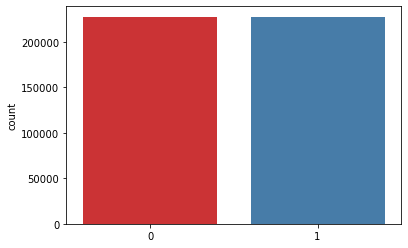

In [94]:
from imblearn.over_sampling import SMOTE

print("Transaction Number x_train dataset: ", x_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number x_test dataset: ", x_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_sample(x_train, y_train.ravel())


print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='Set1')

# Random Forest with SMOTE

In [89]:
from sklearn.ensemble import RandomForestClassifier as rfc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.82      0.37      0.51       101

    accuracy                           1.00     56962
   macro avg       0.91      0.68      0.75     56962
weighted avg       1.00      1.00      1.00     56962



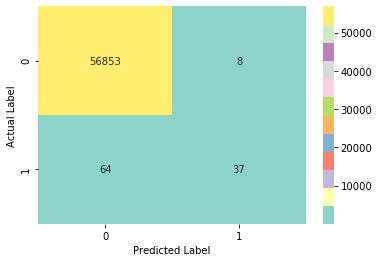

In [96]:
rand_f = rfc(n_estimators=1000, 
             min_samples_split=10, 
             min_samples_leaf=1,
             max_features='auto', 
             max_leaf_nodes=None,
             oob_score=True, 
             n_jobs=-1, 
             random_state=1)

rand_f.fit(x_train_s[:4000], y_train_s[:4000])

y_pred = rand_f.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Set3", fmt='g')

plt.ylabel('Actual Label')

plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

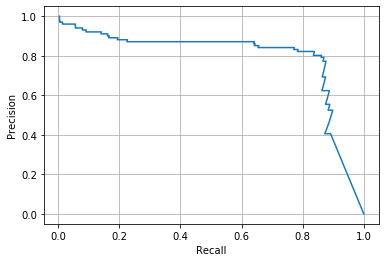

In [91]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()

# Feature Importances

Feature importance ranking


1.V18(0.125458)
2.V13(0.109552)
3.V15(0.098595)
4.V17(0.090956)
5.V11(0.086688)
6.V12(0.072655)
7.V21(0.040823)
8.V16(0.036473)
9.V26(0.034734)
10.V20(0.032699)
11.V1(0.026921)
12.V19(0.025750)
13.V2(0.023836)
14.V4(0.022745)
15.V25(0.018771)
16.V24(0.017605)
17.V3(0.016509)
18.V8(0.016083)
19.V14(0.014081)
20.V7(0.013446)
21.V27(0.013332)
22.V5(0.013044)
23.Time(0.009974)
24.V10(0.009433)
25.Amount(0.006536)
26.V6(0.005575)
27.V28(0.005487)
28.V9(0.005012)
29.V22(0.004367)
30.V23(0.002861)


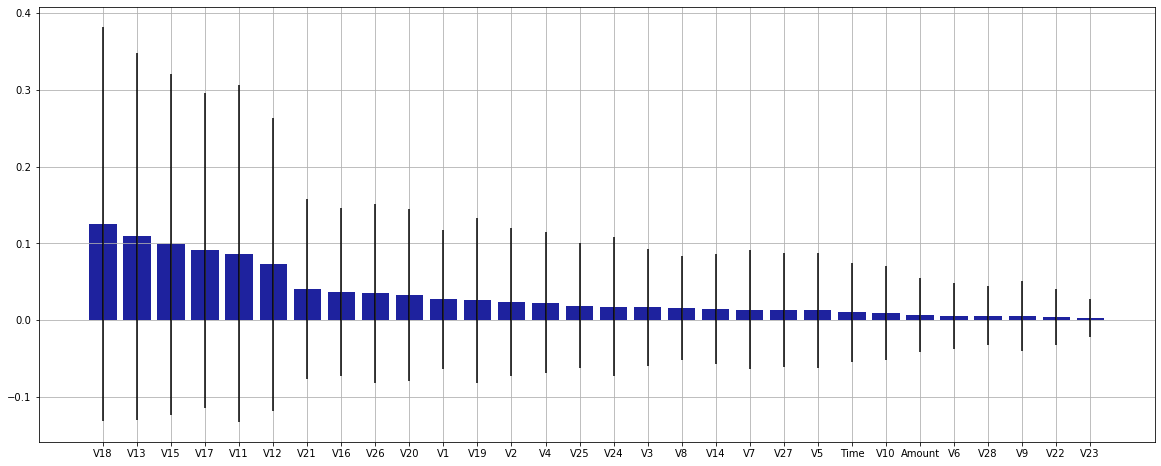

In [130]:
print('Feature importance ranking\n\n')
importances = rand_f.feature_importances_

std = np.std([tree.feature_importances_ for tree in rand_f.estimators_],axis=0)

indices = np.argsort(importances)[::-1]

variables = df.columns

importance_list = []


for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

    
plt.figure(figsize=(20, 8))
#plt.title("Feature importances")

plt.bar(importance_list, importances[indices],
       color="#1E229E", yerr=std[indices], align='center')
plt.grid()

# Logistic Regression with SMOTE

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.98     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.98      0.99     56962



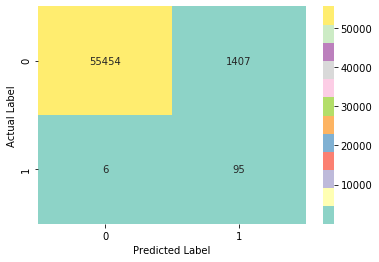

In [68]:
logreg = LogisticRegression()

logreg.fit(x_train_s, y_train_s)

y_pred = logreg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Set3", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

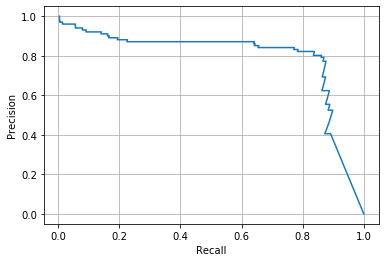

In [69]:
y_pred_prob = logreg.predict_proba(x_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()


# XGBOOST

In [86]:
import xgboost as xgb

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.85      0.45      0.58       101

    accuracy                           1.00     56962
   macro avg       0.92      0.72      0.79     56962
weighted avg       1.00      1.00      1.00     56962



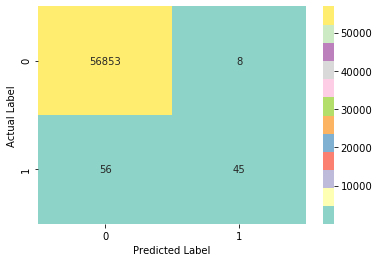

In [87]:
model = xgb.XGBClassifier(n_estimators = 50, max_depth = 3, learning_rate = 0.01)  #n_estimators = 5000 IN REAL max depth =30

model.fit(x_train_s[:4000], y_train_s[:4000])


y_pred = model.predict(x_test)


cnf_matrix = confusion_matrix(y_test, y_pred)


sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Set3", fmt='g')

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

# Neural Networks Sequential Keras

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential([Dense(input_dim=30, units=16, activation='relu'),
                   Dense(units=24, activation='relu'),
                   Dropout(0.5),
                   Dense(units=20, activation='relu'),
                   Dense(units=24, activation='relu'),
                   Dense(units=1, activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,933
Trainable params: 1,933
Non-trainable params: 0
______________________________________________________

In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(x_train_s, y_train_s, batch_size=15, epochs=1) #try epocs 15

30328/30328 [==============================] - 52s 2ms/step - loss: 0.0412 - accuracy: 0.9852


model_loss = pd.DataFrame(model.history.history)  #just has 2 epocs
model_loss.plot()

In [74]:
score = model.evaluate(x_test, y_test)
print(score)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 0.9940
[0.024102995172142982, 0.9940135478973389]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.21      0.87      0.34       101

    accuracy                           0.99     56962
   macro avg       0.61      0.93      0.67     56962
weighted avg       1.00      0.99      1.00     56962



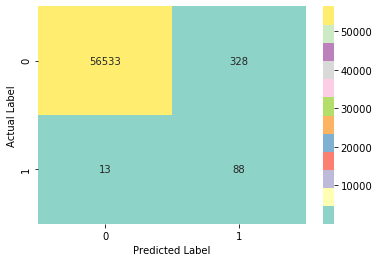

In [73]:
y_pred = model.predict_classes(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Set3", fmt='g')

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

# SVM Classifier

In [75]:
from sklearn import svm

In [76]:
classifier = svm.SVC(kernel='linear')

In [82]:
y_train_s.shape

(454908,)

In [83]:
classifier.fit(x_train_s[:4000], y_train_s[:4000])

SVC(kernel='linear')

In [84]:
prediction_SVM_all = classifier.predict(x_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.82      0.37      0.51       101

    accuracy                           1.00     56962
   macro avg       0.91      0.68      0.75     56962
weighted avg       1.00      1.00      1.00     56962



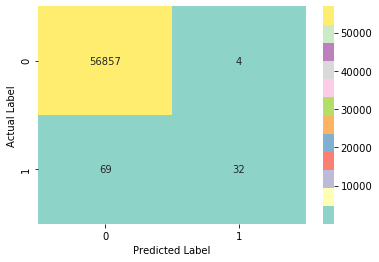

In [95]:
cnf_matrix = confusion_matrix(y_test, prediction_SVM_all)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Set3", fmt='g')

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))